stimulus start: 0.0, stimulus end: 1.0
simulating 426 neurons. Start: Sun Jul 17 23:10:15 2022


INFO       width adjusted from 20. ms to 20.1 ms [brian2.monitors.ratemonitor.adjusted_width]


sim end: Sun Jul 17 23:11:14 2022


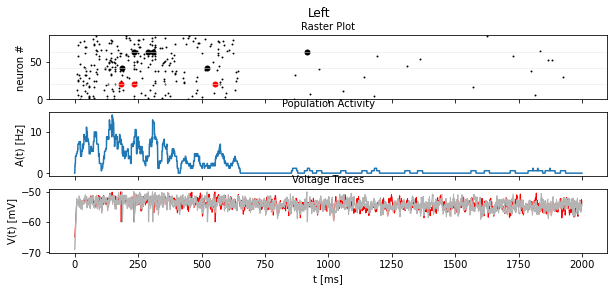

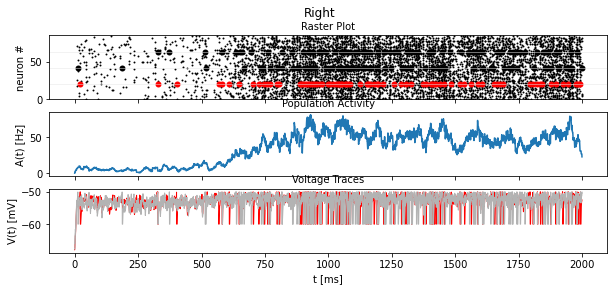

In [1]:
import wang

import brian2 as b2
from brian2 import NeuronGroup, Synapses, PoissonInput, PoissonGroup, network_operation
from brian2.monitors import StateMonitor, SpikeMonitor, PopulationRateMonitor
from random import sample
import numpy.random as rnd
from neurodynex3.tools import plot_tools
import numpy as np
import matplotlib.pyplot as plt
from math import floor
import time

b2.defaultclock.dt = 0.10 * b2.ms

%matplotlib inline
#from neurodynex3.competing_populations import decision_making

"""
A simple example to get started.
Returns:

"""
stim_start = 0. * b2.ms
stim_duration = 1000 * b2.ms
print("stimulus start: {}, stimulus end: {}".format(stim_start, stim_start+stim_duration))

results = wang.sim_decision_making_network(N_Excit=341, N_Inhib=85, weight_scaling_factor=6.0,
                                      t_stimulus_start=stim_start, t_stimulus_duration=stim_duration,
                                      coherence_level=+0.0, w_pos=2.0, mu0_mean_stimulus_Hz=250 * b2.Hz,
                                      max_sim_time=2000. * b2.ms)
plot_tools.plot_network_activity(results["rate_monitor_A"], results["spike_monitor_A"],
                                 results["voltage_monitor_A"], t_min=0. * b2.ms, avg_window_width=20. * b2.ms,
                                 sup_title="Left")
plot_tools.plot_network_activity(results["rate_monitor_B"], results["spike_monitor_B"],
                                 results["voltage_monitor_B"], t_min=0. * b2.ms, avg_window_width=20. * b2.ms,
                                 sup_title="Right")

plt.show()

In [2]:
spike_mon_a = results["spike_monitor_A"]
spike_mon_b = results["spike_monitor_B"]



In [3]:
print(spike_mon_a.i[:])


[34 13 26 57 72  6 24 32 47 76 28  1  5 25 19 43 77 41 61 69 32 11 20 70
 37 32  9 22 17  5 28  2 18  3 37 46  5 80 25 74 45 72  2 17 60 24 84 36
 65 40 64 34 78 54 58 73 65 13 40 41 19 66 54 44  1  5 20 40 39 50 75 48
 52 40 79 75 55 32 51 34 61 43 14 77 49 11  4  1  0 49 38 20 43 48 53 40
 46 56 71 66 15 11 37 61 19 58 24 62 21 41 42 32 37 12 60 82 59 84 30 52
 58 82 28 79 67  4 21 50 58 63 40 46 41  0 73 23 40 64 50 51 79 73 62 79
 69 57 70 37  9 48 28 80 55 60  6 58  2 43 63 12 73 47 72 52 81 57 64 78
 63 19  5 67 54 60  8 70 72 57 22 24 69 37 83 37 68 68  2 46 48 27 25 49
 20 51  6 38 81 70 54  9 46  4 48 62 37 55 59 51 33 35 74 38 25 81 28 36
 22 23 74  1 81 84  4 77 82  8 25 29 13 70 75 75  3 61 39 80 42 71 73 49
  9 21 39 59 67 78 61 44 76 20 23 17 27 56 77 72  3  8 64 65 73 79 62 13
 25 36 28 37  0 32 63  7 40 11 29  5 57 44 54 16 84 58 38  6 64 52 52 30]


In [4]:
spike_neurons = (spike_mon_b.i[:])


### getting averaged membrane potential

In [5]:
rmp_A = results["voltage_monitor_A"]
rmp_B = results["voltage_monitor_B"]

In [7]:
n_time = len(rmp_A[3].v)



In [8]:
n_sample_cells = np.shape(rmp_A)[0]
rmp_mat_A = np.zeros([n_sample_cells, n_time])

In [9]:
for i in range(n_sample_cells):
    rmp_mat_A[i,:] = rmp_A[i].v/b2.mV
    
rmp_mat_A_ave=(rmp_mat_A.mean(axis=0))




In [10]:
rmp_mat_A.shape

(85, 20000)

In [12]:
rmp_mat_A_ave.mean()

-54.39454186115416

In [20]:
def rmp_ave(results):
	rmp_A = results["voltage_monitor_A"]
	rmp_B = results["voltage_monitor_B"]
	n_time = len(rmp_A[0].v)	
	n_sample_cells = np.shape(rmp_A)[0]
	rmp_mat_A = np.zeros([n_sample_cells, n_time])
	rmp_mat_B = np.zeros([n_sample_cells, n_time])


	for i in range(n_sample_cells):
	    rmp_mat_A[i,:] = rmp_A[i].v/b2.mV
	    rmp_mat_B[i,:] = rmp_B[i].v/b2.mV
	    
	rmp_mat_A_ave=(rmp_mat_A.mean(axis=0))
	rmp_mat_B_ave=(rmp_mat_B.mean(axis=0))
	rmp_mean_A = rmp_mat_A_ave.mean()
	rmp_mean_B = rmp_mat_B_ave.mean()
	return rmp_mean_A, rmp_mean_B







In [21]:
rmp_ave(results)

(-54.39454186115416, -53.421751147099094)